In [14]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [28]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_name = '2017_12_05_14_35_54_f12-readout-test'
exp_date = '_'.join(exp_name.split('_')[:3])
experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
cuts = [[30],[2]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
q.set_thresholds(cuts)

name 'fort_exp' is not defined


In [29]:
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

In [30]:
retention = q.apply_thresholds()

In [31]:
tbl_str = "ivar:\t{0:.2f}\tretention:{1:.3f} +- {2:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	0.00	retention:0.962 +- 0.005
ivar:	0.09	retention:0.025 +- 0.004


In [32]:
q.save_experiment_data()

<IPython.core.display.Javascript object>


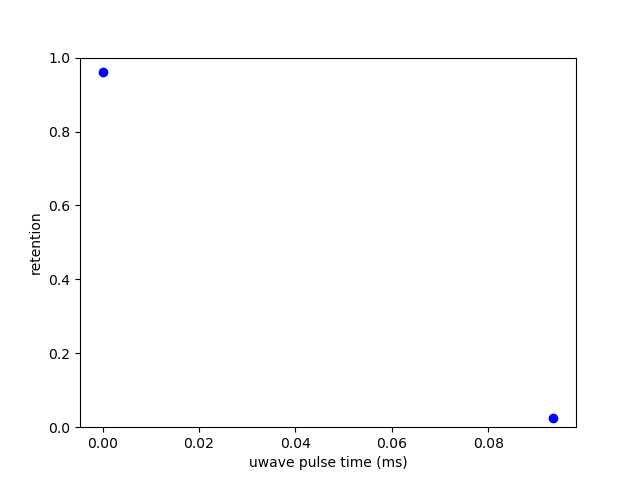

Text(0,0.5,u'retention')

In [33]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.errorbar(retention['ivar'][e], retention['retention'][e],
                yerr=retention['error'][e],
                fmt = 'bo'
    )
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')

<IPython.core.display.Javascript object>


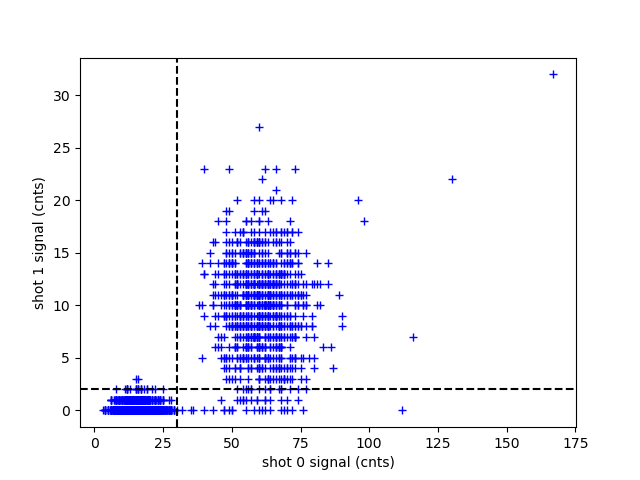

Text(0,0.5,u'shot 1 signal (cnts)')

In [34]:
itr = 0*(len(retention['ivar'][e])-1)
fig, ax = plt.subplots()
s0_data = q.experiments[0]['iterations'][itr]['signal_data'][:,0]
s1_data = q.experiments[0]['iterations'][itr]['signal_data'][:,1]
ax.plot(s0_data, s1_data, 'b+')

for xc in cuts[0]:
    plt.axvline(x=xc, color='k', linestyle='--')
for xc in cuts[1]:
    plt.axhline(y=xc, color='k', linestyle='--')

ax.set_xlabel('shot 0 signal (cnts)')
ax.set_ylabel('shot 1 signal (cnts)')